# Task 5: Exploratory Data Analysis - Sports

# Name : Aniket Anand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# importing Match dataset

In [7]:
matches = pd.read_csv("C:\\Users\\ani12\\Downloads\\matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Drop umpire3 column because it has a lot of null values

In [10]:
matches.drop(columns=['umpire3'],axis=1)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# importing Deliveries dataset

In [11]:
deliveries = pd.read_csv("C:\\Users\\ani12\\Downloads\\deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [13]:
#Listing the columns

In [14]:
matches.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [15]:
deliveries.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'], dtype=object)

# Creating the separate dataframe for the winning team

In [16]:
winner=matches[['id','season','winner','player_of_match']]
winner

,id,season,winner,player_of_match
0,1,2017,Sunrisers Hyderabad,Yuvraj Singh
1,2,2017,Rising Pune Supergiant,SPD Smith
2,3,2017,Kolkata Knight Riders,CA Lynn
3,4,2017,Kings XI Punjab,GJ Maxwell
4,5,2017,Royal Challengers Bangalore,KM Jadhav
...,...,...,...,...
751,11347,2019,Mumbai Indians,HH Pandya
752,11412,2019,Mumbai Indians,AS Yadav
753,11413,2019,Delhi Capitals,RR Pant
754,11414,2019,Chennai Super Kings,F du Plessis


# plotting the winning teams

C:\Users\ani12\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


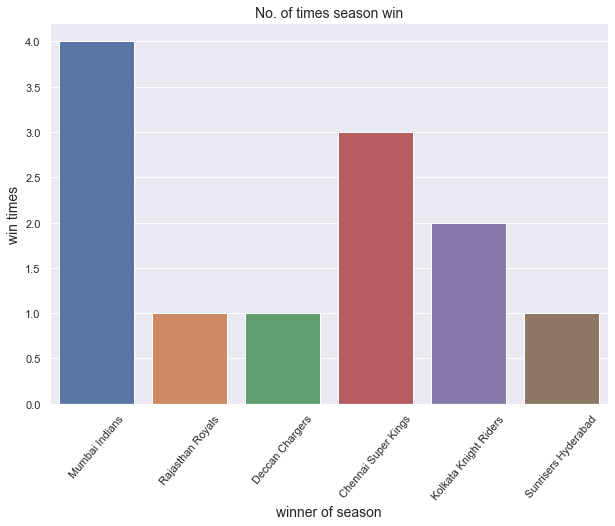

In [17]:
season_win = winner[['season','winner']]
season_win = season_win.drop_duplicates(subset=['season'],keep='last')
season_win.reset_index(drop=True).sort_values('season')
plt.figure(figsize=(10,7))
sns.countplot('winner',data=season_win)
plt.xlabel('winner of season',size=14)
plt.ylabel('win times',size=14)
plt.title('No. of times season win',size=14)
plt.xticks(rotation=50)
plt.show()

In [18]:
#Plotting player of match winners

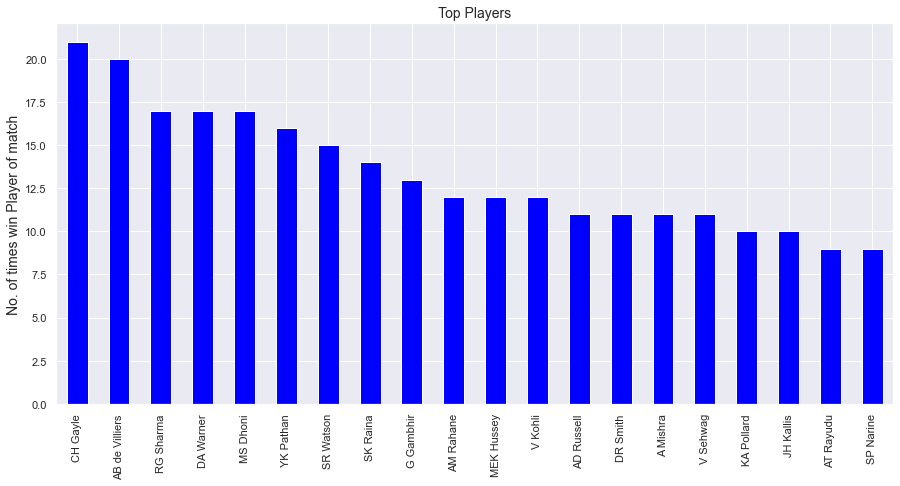

In [27]:
pom_df=winner[['id','player_of_match']]
POM = pom_df.player_of_match.value_counts()[:20]
plt.figure(figsize=(15,7))
POM.plot.bar(color='blue')
plt.ylabel('No. of times win Player of match',size=14)
plt.title("Top Players",size=14)
plt.show()

In [21]:
#Plotting maximum runs scorer

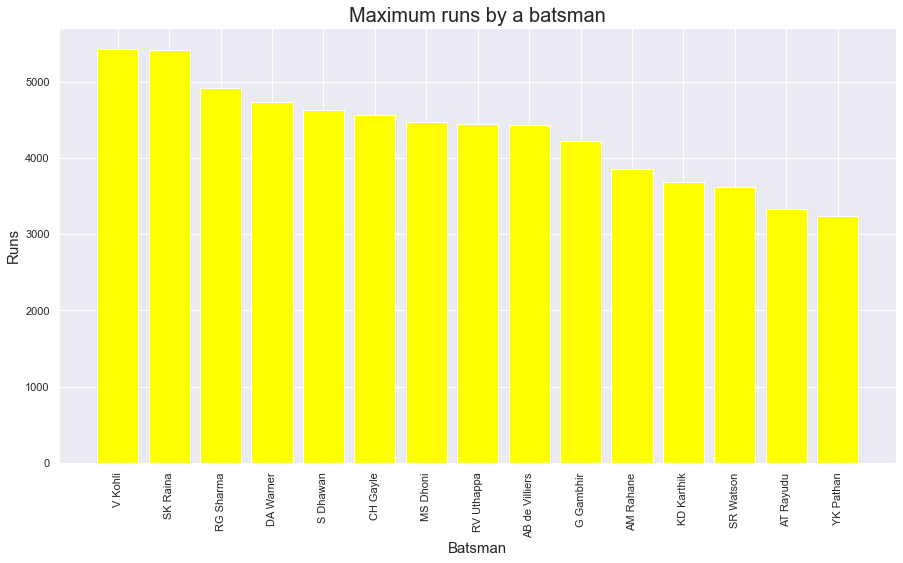

In [25]:
batsman_score=deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index()
batsman_score=batsman_score.sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
batsman_score=batsman_score.iloc[:15]

plt.figure(figsize=(15,8))
plt.bar(batsman_score['batsman'],batsman_score['batsman_runs'],color='Yellow')
plt.title("Maximum runs by a batsman",fontsize=20)
plt.xlabel("Batsman",fontsize=15)
plt.ylabel("Runs",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [28]:
#Plotting maximum wicket takers (Bowler)

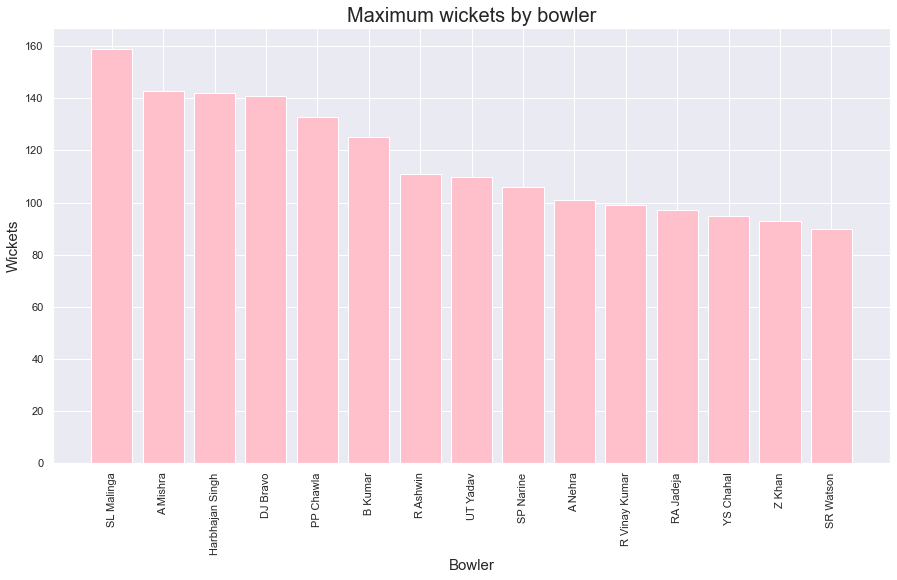

In [32]:
bowler=deliveries[['bowler','dismissal_kind']].dropna(axis=0).reset_index(drop=True)
bowler = bowler[~bowler['dismissal_kind'].isin(['run out','retired hurt','lbw','obstructing the field'])]

bowlers_wicket=bowler.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index()
bowlers_wicket=bowlers_wicket.sort_values('count',ascending=False).reset_index(drop=True)
bowlers_wicket=bowlers_wicket.iloc[:15]

plt.figure(figsize=(15,8))
plt.bar(bowlers_wicket['bowler'],bowlers_wicket['count'],color='pink')
plt.title("Maximum wickets by bowler",fontsize=20)
plt.xlabel("Bowler",fontsize=15)
plt.ylabel("Wickets",fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Toss factor for win and loss of a team

<ipython-input-35-5d1b67b480ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toss['win_by']=np.where(toss['win_by_wickets']>0,'Ball First','Bat First')


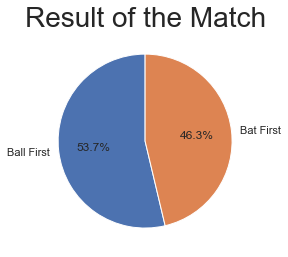

In [35]:
toss=matches[['season','win_by_wickets','toss_decision']]

toss['win_by']=np.where(toss['win_by_wickets']>0,'Ball First','Bat First')
wins = toss['win_by'].value_counts()
lb = np.array(wins.index)
plt.figure(figsize=(8,4))
plt.pie(wins,startangle=90,labels=lb,autopct='%1.1f%%')
plt.title("Result of the Match",fontsize=28)
plt.show()

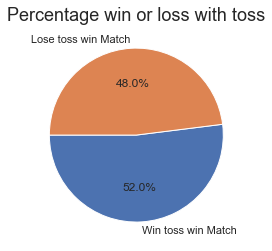

In [36]:
toss_win=matches[['toss_winner','toss_decision','winner']]
Toss_Win=toss_win['toss_winner']==toss_win['winner']
TW = Toss_Win.value_counts()
plt.figure(figsize = (8,4))
plt.pie(TW, labels=['Win toss win Match','Lose toss win Match'],autopct='%1.1f%%',startangle=180)
plt.title("Percentage win or loss with toss",fontsize=18)
plt.show()

# Plotting Maximums

In [37]:
bd = deliveries[['batting_team','batsman_runs','batsman']]
bd['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

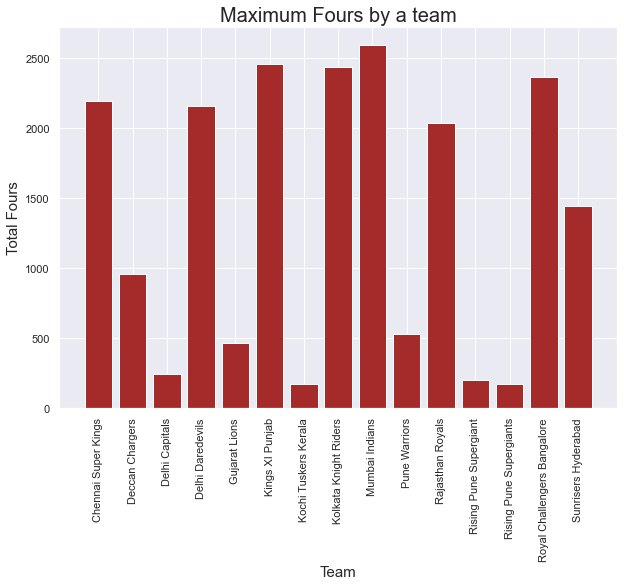

In [43]:
fours = bd[bd['batsman_runs']==4].groupby('batting_team')['batsman_runs'].agg([('Fours','count')])
sixes = bd[bd['batsman_runs']==6].groupby('batting_team')['batsman_runs'].agg([('Sixes','count')])
Boundary = sixes.merge(fours,how='inner',left_on='batting_team',right_on='batting_team')
Boundary['total']=sixes['Sixes']+fours['Fours']
Boundary['batting_team']=['Chennai Super Kings','Deccan Chargers','Delhi Capitals','Delhi Daredevils',
                         'Gujarat Lions','Kings XI Punjab','Kochi Tuskers Kerala','Kolkata Knight Riders',
                         'Mumbai Indians','Pune Warriors','Rajasthan Royals','Rising Pune Supergiant',
                          'Rising Pune Supergiants','Royal Challengers Bangalore','Sunrisers Hyderabad']

plt.figure(figsize=(10,7))
plt.bar(Boundary['batting_team'],fours['Fours'],color='brown')
plt.title("Maximum Fours by a team",fontsize=20)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Total Fours",fontsize=15)
plt.xticks(rotation=90)
plt.show()

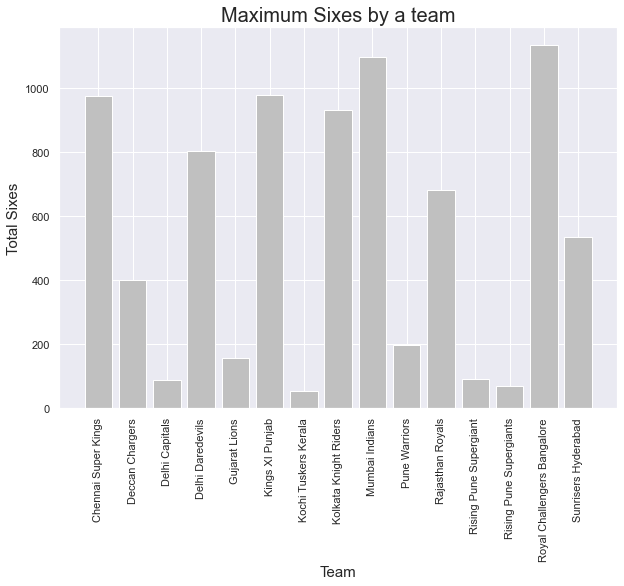

In [55]:
plt.figure(figsize=(10,7))
plt.bar(Boundary['batting_team'],sixes['Sixes'],color='silver')
plt.title("Maximum Sixes by a team",fontsize=20)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Total Sixes",fontsize=15)
plt.xticks(rotation=90)
plt.show()

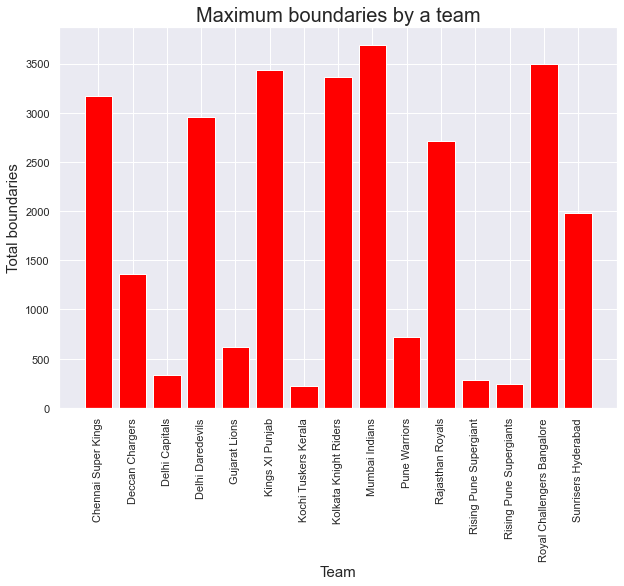

In [51]:
plt.figure(figsize=(10,7))
plt.bar(Boundary['batting_team'],Boundary['total'],color='Red')
plt.title("Maximum boundaries by a team",fontsize=20)
plt.xlabel("Team",fontsize=15)
plt.ylabel("Total boundaries",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [57]:
four_batsman = bd[bd['batsman_runs']==4].groupby('batsman')['batsman_runs'].agg([('Fours','count')])
four_batsman=four_batsman.sort_values('Fours',ascending=False)[:10]
four_batsman

,Fours
batsman,
S Dhawan,526
SK Raina,495
G Gambhir,492
V Kohli,482
DA Warner,459
RV Uthappa,436
RG Sharma,431
AM Rahane,405
CH Gayle,376


In [58]:
six_batsman = bd[bd['batsman_runs']==6].groupby('batsman')['batsman_runs'].agg([('Sixes','count')])
six_batsman=six_batsman.sort_values('Sixes',ascending=False)[:10]
six_batsman

,Sixes
batsman,
CH Gayle,327
AB de Villiers,214
MS Dhoni,207
SK Raina,195
RG Sharma,194
V Kohli,191
DA Warner,181
SR Watson,177
KA Pollard,175


# Conclusion
Mumbai Indians has won the maximum number of seasons followed by Chennai Super Kings and Kolkata Knight Riders.

CH Gayle has won maximum player of the match awards followed by AB de Villiers.
V Kohli and SK Raina are maximum run scorer with having minute difference followed by RG Shama.
SL Malinga has taken maximum number of wickets followed by A Mishra.

Most of the teams win the match by doing bowling first.
Mostly teams whose win the toss will win the match.

Maximum number of fours are hit by Mumbai Indians followed by Kings XI Punjab.
Maximum number of sixes are hit by Royal Challengers Bangalore followed by Mumbai Indians.
Maximum number of boundaries are hit by Mumbai Indians followed by Royal Challengers Bangalore.
Maximun number of fours are hit by S Dhawan.
Maximun number of sixes are hit by CH Gayle.

Most successful teams, players and factors contributing win or loss of a team:-
    Successful Teams: Mumbai Indians, Chennai Super Kings
    Successful Players: CH Gayle, V Kohli, S Dhawan.
    Most of the teams win the match by doing bowling first.
    Mostly teams whose win the toss will win the match

Suggesting company to endorse for its products on these:-
    Teams- Mumbai Indians, Chennai Super Kings
    Players- CH Gayle, V Kohli, SL Malinga